# ID vs RMSD Comparison

As the two metrics provide similar results, despite being significantly different, we compared them on both [villin](#villin) and [NTL9](#ntl9).

RMSD is a measure of the displacement of the atoms from a reference structure, whereas ID, in this case, can detect different features of the protein.

In [1]:
%run maintainer/sett.py

Settings loaded.


## Villin

In [2]:
topology='examples/villin/2f4k.pdb'
trajectory='examples/villin/2f4k'
protein = 'villin'

data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
estimators = ['TwoNN']
projection_method = 'Dihedrals'  # or 'Distances'
 
ref = Molecule(topology)

for estimator, state in product(estimators, states):
    mean_all, mean_last, local_id = intrinsic_dimension(
        topology=topology, 
        trajectory=trajectory+f'_{state}.xtc', 
        projection_method=projection_method, 
        id_method='local',
        id_kwargs={'estimator': estimator}, 
        verbose=False
        )
    
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    met=metricrmsd.MetricRmsd(ref, trajrmsdstr= 'protein and name CA')
    rmsd_values=met.project(mol)
	
    data.append({'trajectory': state,
	  'estimator': estimator,
	  'mean_all': mean_all,
	  'mean_last': mean_last,
      'local_id': local_id,
	  'rmsd': rmsd_values})
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")


2025-11-07 17:28:17,506 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-11-07 17:28:17,528 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 577 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.
2025-11-07 17:28:19,959 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-11-07 17:28:19,976 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 577 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrappin

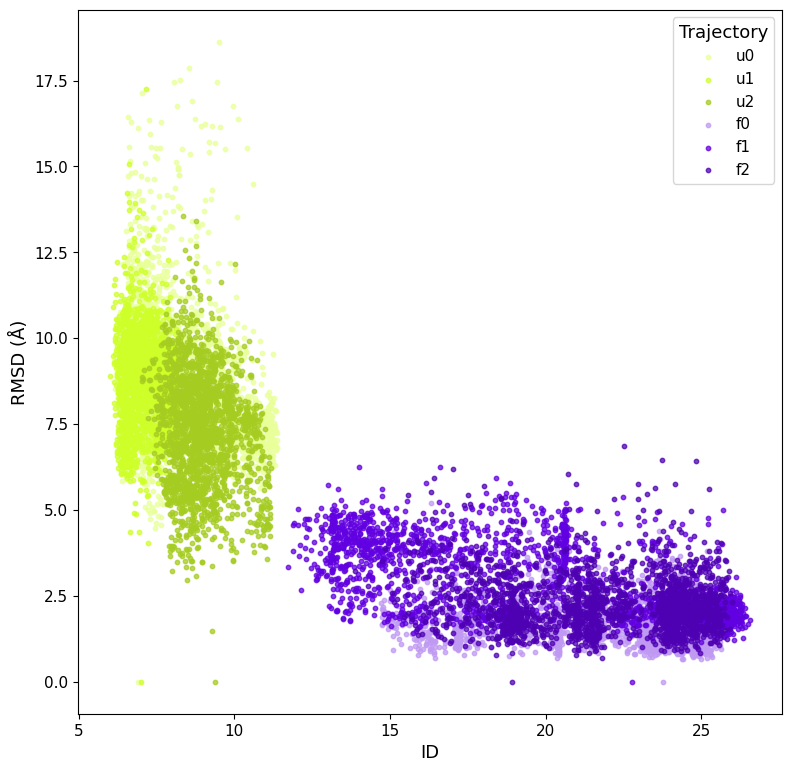

In [3]:
fig, ax = plt.subplots(figsize=(8,8))

# group data by state
for i, s in enumerate(states):
    subset = data[data['trajectory'] == s]
    local_id_array = np.concatenate(subset['local_id'].values)
    rmsd_array = np.concatenate(subset['rmsd'].values)
    ax.scatter(local_id_array, rmsd_array,color=colors.colors[i], alpha=0.75, label=s, s=10)#, edgecolor = 'black'
ax.set_box_aspect(1)
plt.xlabel('ID')
plt.ylabel('RMSD (Å)')
plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
#plt.savefig(f'../extra/villin_ID_vs_RMSD_{projection_method}.pdf', dpi = 300)
plt.show()

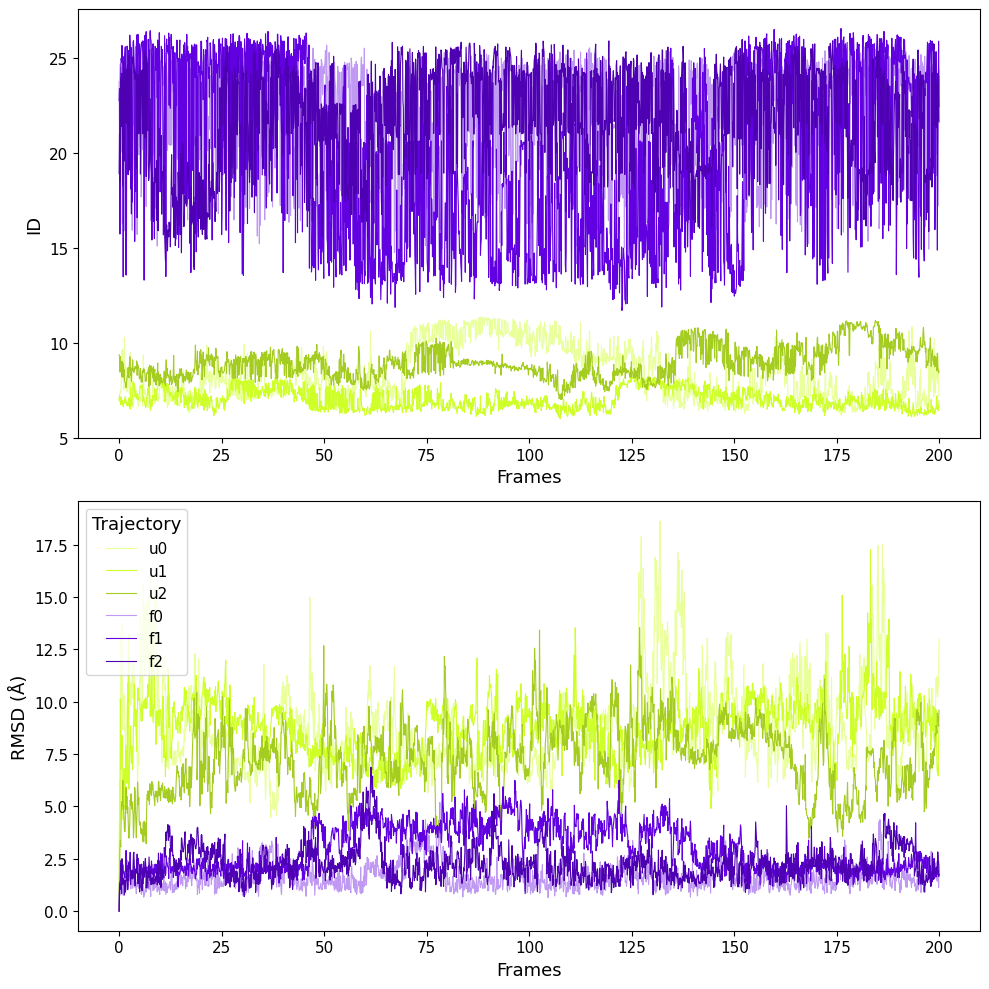

In [4]:
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 

state_ids = []

fig, ax = plt.subplots(figsize=(10, 10), nrows=2)

for i, s in enumerate(states):
    local_id = data.loc[i, 'local_id']
    rmsd = data.loc[i, 'rmsd']
    frames = np.arange(len(local_id))
    time_ns = frames / 10.0  # Convert frames to nanoseconds

    ax[0].plot(time_ns, local_id, color=colors.colors[i], linewidth=0.8)
    ax[1].plot(time_ns, rmsd, color=colors.colors[i], linewidth=0.8, label = s)
ax[0].set_xlabel("Frames")
ax[0].set_ylabel("ID")
ax[1].set_xlabel("Frames")
ax[1].set_ylabel("RMSD (Å)")
ax[1].legend(loc="upper left", title='Trajectory')   
plt.tight_layout()
#plt.savefig(f'../extra/villin_ID_and_RMSD_{projection_method}.png', dpi = 300)
plt.show()


## NTL9

In [5]:
topology='examples/NTL9/ntl9.pdb'
trajectory='examples/NTL9/ntl9'
protein = 'ntl9'

data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
estimators = ['TwoNN']
projection_method = 'Dihedrals'  # or 'Distances'
projection_kwargs = {'skip': 3}
 
ref = Molecule(topology)

for estimator, state in product(estimators, states):
    mean_all, mean_last, local_id = intrinsic_dimension(topology=topology, 
                                                        trajectory=trajectory+f'_{state}.xtc',
                                                        projection_method=projection_method, 
                                                        projection_kwargs = projection_kwargs,
                                                        id_method='local',
                                                        id_kwargs={'estimator': estimator}, 
                                                        verbose=False
                                                        )
    mol = ref
    mol.read(trajectory+f'_{state}.xtc')
    met=metricrmsd.MetricRmsd(ref, trajrmsdstr= 'protein and name CA')
    rmsd_values=met.project(mol)
	
    data.append({'trajectory': state,
	  'estimator': estimator,
	  'mean_all': mean_all,
	  'mean_last': mean_last,
      'local_id': local_id,
	  'rmsd': rmsd_values})
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")


2025-11-07 17:28:32,850 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-11-07 17:28:32,870 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 624 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.
2025-11-07 17:28:35,328 - moleculekit.projections.metricrmsd - WARNING - Reference molecule contains multiple frames. MetricRmsd will calculate the RMSD to the frame set in the refmol.frame variable.
2025-11-07 17:28:35,346 - moleculekit.molecule - WARNING - Wrapping detected 0 bonds and 624 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrappin

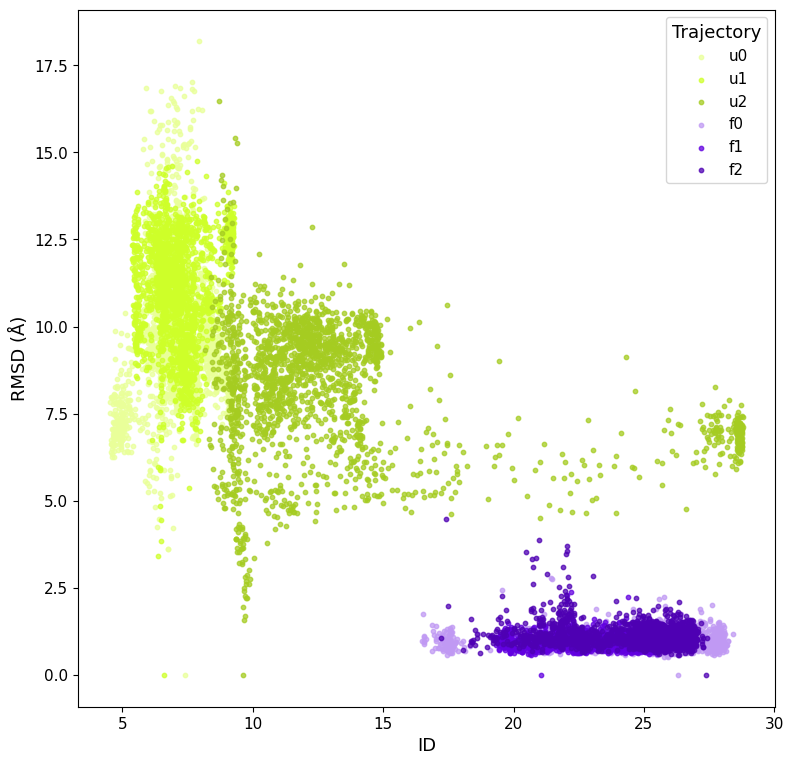

In [7]:
#ID vs RMSD

fig1, ax1 = plt.subplots(figsize=(8,8))

states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 
for i, s in enumerate(states):
    subset = data[data['trajectory'] == s]
    local_id_array = np.concatenate(subset['local_id'].values)
    rmsd_array = np.concatenate(subset['rmsd'].values)
    ax1.scatter(local_id_array,
                 rmsd_array,
                 color=colors.colors[i], 
                 alpha=0.75, 
                 label=s, 
                 s=10
                 )
ax1.set_box_aspect(1)
plt.xlabel('ID')
plt.ylabel('RMSD (Å)')
plt.legend(loc='best', title='Trajectory')
plt.tight_layout()
#plt.savefig(f'../extra/ntl9_ID_vs_RMSD_{projection_method}.pdf', dpi = 300)
plt.show()




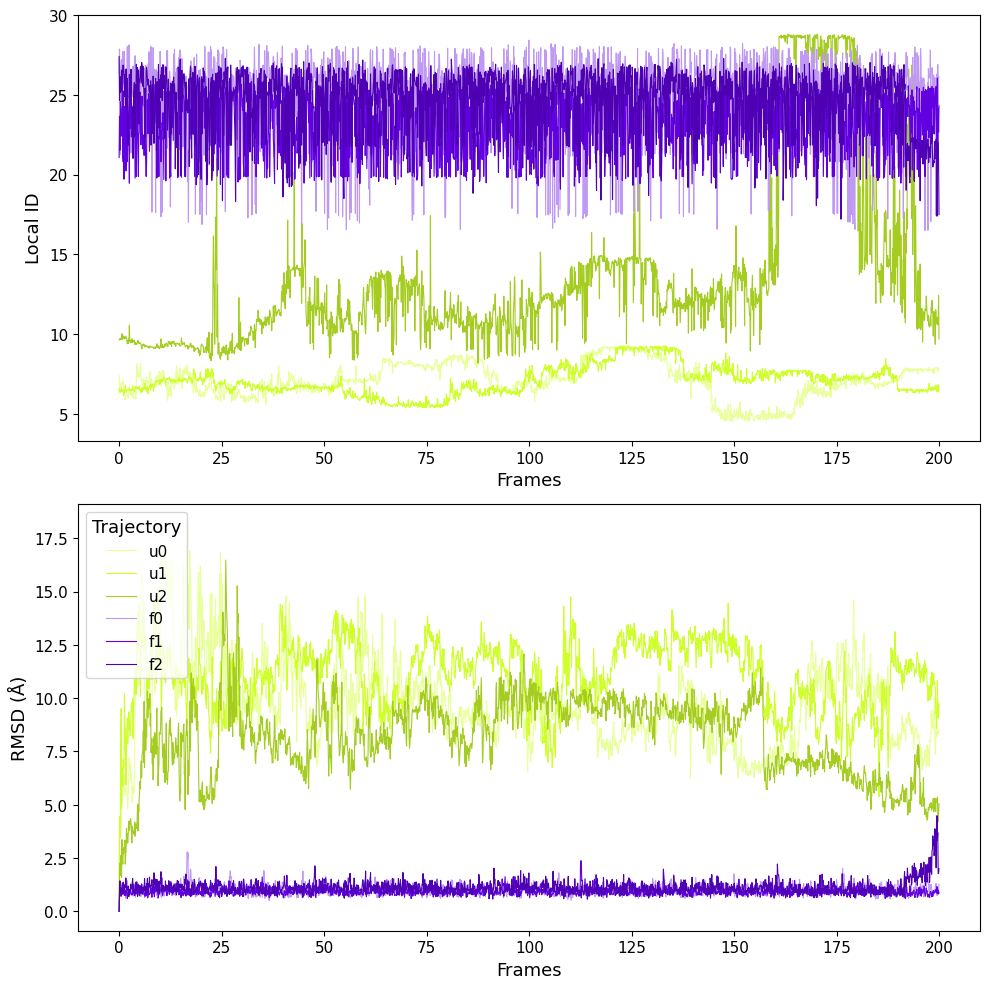

In [8]:
#ID vs time RMSD vs TIME

fig2, ax2 = plt.subplots(figsize=(10, 10), nrows=2)

for i, s in enumerate(states):
    local_id = data.loc[i, 'local_id']
    rmsd = data.loc[i, 'rmsd']
    frames = np.arange(len(local_id))
    time_ns = frames / 10.0  # Convert frames to nanoseconds

    ax2[0].plot(time_ns, local_id, color=colors.colors[i], linewidth=0.8)
    ax2[1].plot(time_ns, rmsd, color=colors.colors[i], linewidth=0.8, label = s)
ax2[0].set_xlabel("Frames")
ax2[0].set_ylabel("Local ID")
ax2[1].set_xlabel("Frames")
ax2[1].set_ylabel("RMSD (Å)")

ax2[1].legend(loc="upper left", title='Trajectory')   

plt.tight_layout()
#plt.savefig(f'../extra/ntl9_ID_and_RMSD_{projection_method}.png', dpi = 300)
plt.show()